#                                                             Practical 2 

# Multiple  Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data.drop(['car_ID', 'symboling', 'CarName'], axis=1, inplace=True)

In [5]:
data

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Data Visualization

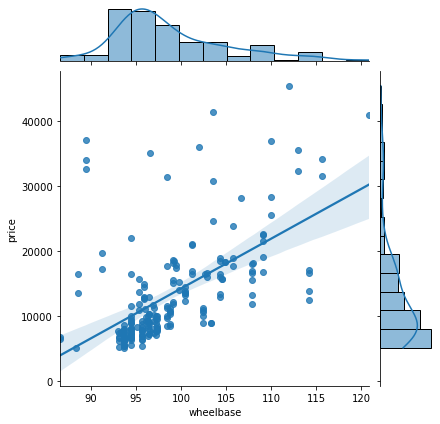

In [6]:
sns.jointplot(x=data['wheelbase'], y=data['price'], data=data, kind='reg')

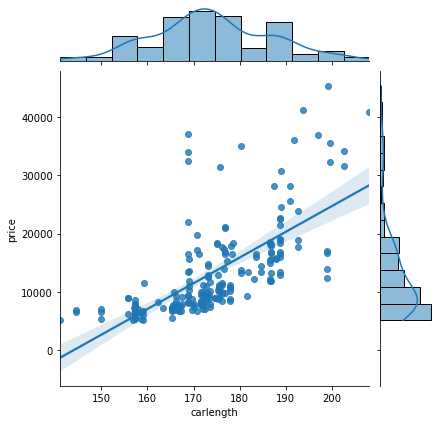

In [7]:
sns.jointplot(x=data['carlength'], y=data['price'], data=data, kind='reg')

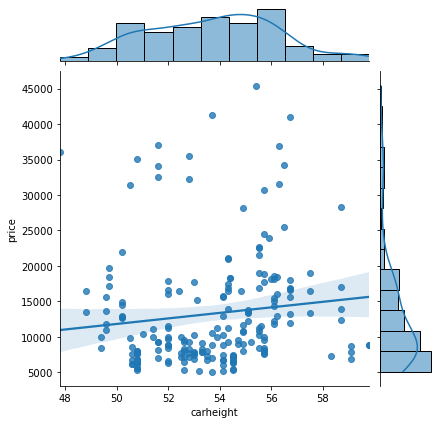

In [8]:
sns.jointplot(x=data['carheight'], y=data['price'], data=data, kind='reg')

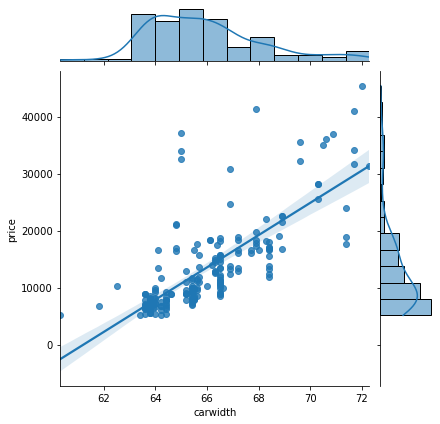

In [9]:
sns.jointplot(x=data['carwidth'], y=data['price'], data=data, kind='reg')

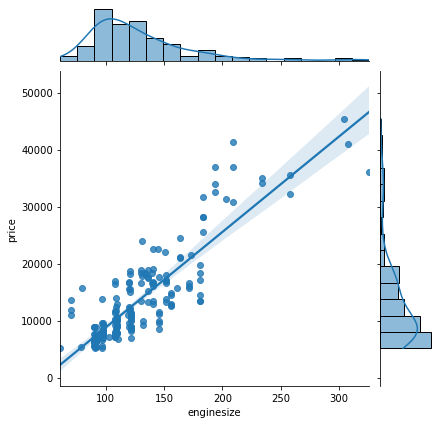

In [10]:
sns.jointplot(x=data['enginesize'], y=data['price'], data=data, kind='reg')

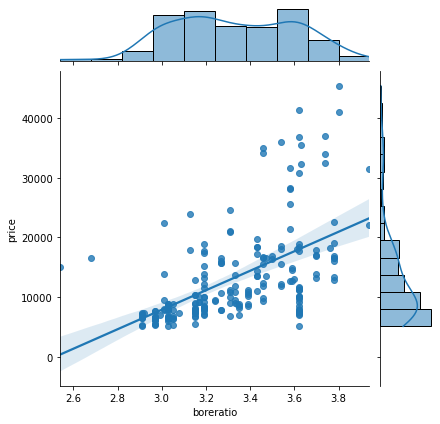

In [11]:
sns.jointplot(x=data['boreratio'], y=data['price'], data=data, kind='reg')

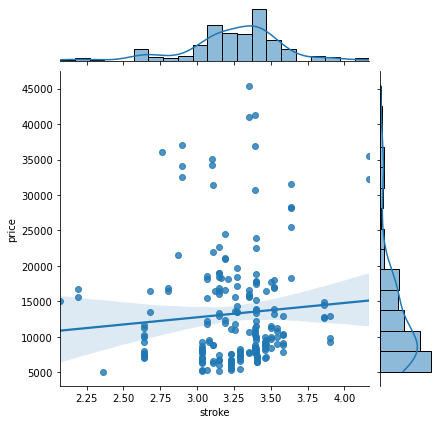

In [12]:
sns.jointplot(x=data['stroke'], y=data['price'], data=data, kind='reg')

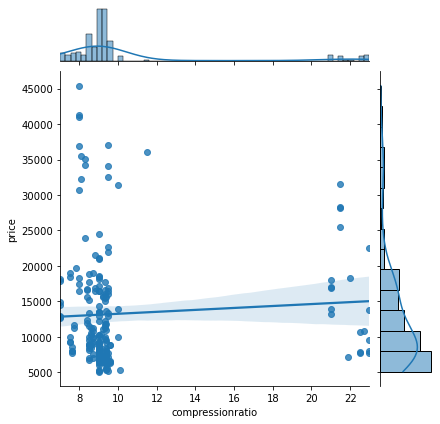

In [13]:
sns.jointplot(x=data['compressionratio'], y=data['price'], data=data, kind='reg')

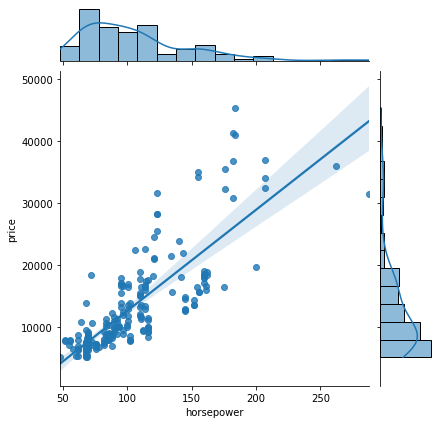

In [14]:
sns.jointplot(x=data['horsepower'], y=data['price'], data=data, kind='reg')

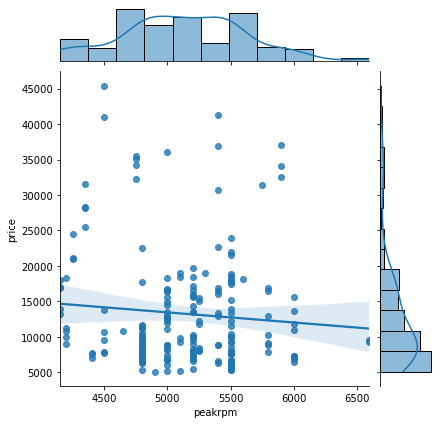

In [15]:
sns.jointplot(x=data['peakrpm'], y=data['price'], data=data, kind='reg')

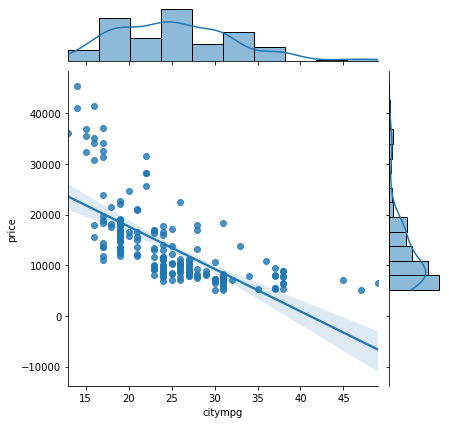

In [16]:
sns.jointplot(x=data['citympg'], y=data['price'], data=data, kind='reg')

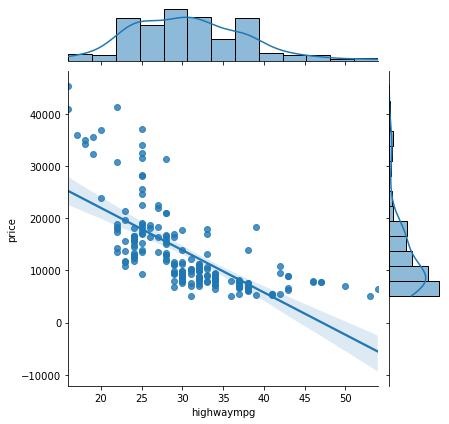

In [17]:
sns.jointplot(x=data['highwaympg'], y=data['price'], data=data, kind='reg')

In [18]:
X= data[['wheelbase']]

Y=data[['price']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['wheelbase'].to_numpy()
x_test=x_test['wheelbase'].to_numpy()
y_train=y_train['price'].to_numpy()
y_test=y_test['price'].to_numpy()


print('Train - Predictors shape', x_train.shape)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (164,)
Train - Predictors shape (164, 1)
Test - Predictors shape (41, 1)
Train - Target shape (164, 1)
Test - Target shape (41, 1)


## Model Buliding and Training

In [20]:
model = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
model.fit(x_train,y_train)

LinearRegression()

In [22]:
prediction = model.predict(x_test)

In [23]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [24]:
print('Co-efficient of linear regression',model.coef_)

Co-efficient of linear regression [[656.82196289]]


In [25]:
print('Intercept of linear regression model',model.intercept_)

Intercept of linear regression model [-51623.73665914]


In [26]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 36264687.94132166


In [27]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.5406278076891525


Text(0.5, 1.0, 'Linear Regression')

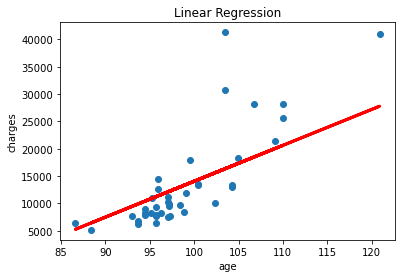

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

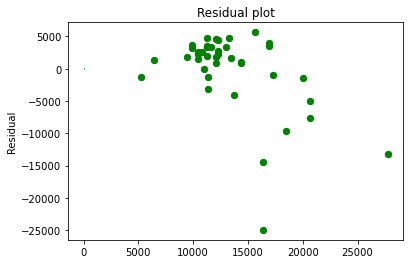

In [30]:
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [33]:
X= data[['horsepower']]

Y=data[['price']]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train=x_train['horsepower'].to_numpy()
x_test=x_test['horsepower'].to_numpy()
y_train=y_train['price'].to_numpy()
y_test=y_test['price'].to_numpy()


print('Train - Predictors shape', x_train.shape)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (164,)
Train - Predictors shape (164, 1)
Test - Predictors shape (41, 1)
Train - Target shape (164, 1)
Test - Target shape (41, 1)


In [36]:
model = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
model.fit(x_train,y_train)

LinearRegression()

In [37]:
prediction = model.predict(x_test)

In [38]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [39]:
print('Co-efficient of linear regression',model.coef_)

Co-efficient of linear regression [[156.16135725]]


In [40]:
print('Intercept of linear regression model',model.intercept_)

Intercept of linear regression model [-3126.86991019]


In [41]:
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))

Mean Square Error 29003009.23378659


In [42]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Model R^2 Square value 0.6326129716904236


Text(0.5, 1.0, 'Linear Regression')

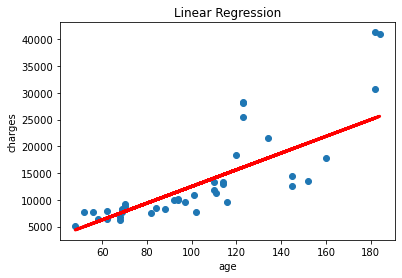

In [43]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

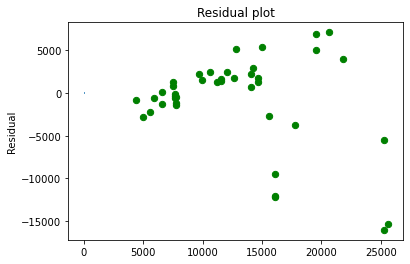

In [44]:
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')